In [1]:
# Importing libraries and setting up the environment
import warnings

warnings.filterwarnings("ignore")  # setting ignore as a parameter
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.basemap import Basemap
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy.stats import f_oneway
from statsmodels.genmod.families import Binomial
from matplotlib.colors import ListedColormap
from scipy.stats import linregress
from scipy.stats import mannwhitneyu
from scipy.stats import kendalltau

image_format = "svg"

In [2]:
# Set colors for PFTs, Function to read in data, Shared paths, Function to plot data
palette = {
    "Arid Shrublands": "#cb7e0c",
    "Boreal Forests": "#0F52BA",
    "Mixed Temperate Forests": "#9acd32",
    "Short Grasslands": "#eebc1d",
    "Temperate Broadleaved Evergreen Forests": "#004953",
    "Temperate Coniferous Forests": "#1b9d77",
    "Temperate Deciduous Forests": "#7570b3",
    "Xeromorphic Forests and Woodlands": "#A4D4B4",
}


# Define PFTs names and labels
pft_labels = {
    4: "Boreal Forests",
    8: "Mixed Temperate Forests",
    9: "Temperate Coniferous Forests",
    10: "Temperate Deciduous Forests",
    13: "Short Grasslands",
    15: "Arid Shrublands",
    19: "Xeromorphic Forests and Woodlands",
    33: "Temperate Broadleaved Evergreen Forests",
    99: "All PFTs",
}


# Function to read in data
def process_data(filepath):
    variable_data = pd.read_csv(
        filepath,
        names=[
            "POTVEG",
            "YEAR",
            "NGRID",
            "TOTCELLAREA",
            "TOTFORECOZONE",
            "MXPRED",
            "MNPRED",
            "MNBYAR",
            "SIMPMN",
            "STNDEV",
            "MNTOTYR",
        ],
    )

    return variable_data


# Variables of interest


# Set Shared paths

shared_root_path = (
    "C:/Users/jmkod/OneDrive/Desktop/Lehigh University/Research/Data/tem/processing/"
)
# .csv files for all models share the same path except for the model name
availn_data_shared_path = "/data/output_summary/AVAILN_BAKEOFF.SUMMARY"
gpp_data_shared_path = "/data/output_summary/GPP_BAKEOFF.SUMMARY"
h2oyield_data_shared_path = "/data/output_summary/H2OYIELD_BAKEOFF.SUMMARY"
vegc_data_shared_path = "/data/output_summary/VEGC_BAKEOFF.SUMMARY"
npp_data_shared_path = "/data/output_summary/NPP_BAKEOFF.SUMMARY"
nep_data_shared_path = "/data/output_summary/NEP_BAKEOFF.SUMMARY"
netnmin_data_shared_path = "/data/output_summary/NETNMIN_BAKEOFF.SUMMARY"
smois_data_shared_path = "/data/output_summary/SMOIS_BAKEOFF.SUMMARY"
soilorgc_data_shared_path = "/data/output_summary/SOILORGC_BAKEOFF.SUMMARY"
veginnpp_data_shared_path = "/data/output_summary/VEGINNPP_BAKEOFF.SUMMARY"
nce_data_shared_path = "/data/output_summary/NCE_BAKEOFF.SUMMARY"



def plot_aggregated_data_one_subplot(dataframe, var, ylabel, filename_and_path):
    plot_df = dataframe.query("POTVEG != 99")
    # Create the figure and subplots
    fig, ax = plt.subplots(figsize=(7, 5))

    # Set plot theme
    sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2})

    # Plot data for the specified potveg value
    sns.lineplot(
        x="YEAR", y=var, hue="PFT", palette=palette, data=plot_df, legend=True, ax=ax
    )

    ax.set_ylabel(ylabel)
    plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
    ax.set_xlabel(r"$Year$")


    plt.rcParams['mathtext.default'] = 'regular'
    ax.legend(bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=2, frameon=False)
   
    # Set plot parameters
    
    plt.rcParams["font.size"] = 12
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["xtick.top"] = False
    plt.rcParams["xtick.direction"] = "in"
    plt.rcParams["xtick.minor.size"] = 5
    plt.rcParams["xtick.major.size"] = 10
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.right"] = False
    plt.rcParams["ytick.direction"] = "in"
    plt.rcParams["ytick.minor.size"] = 5
    plt.rcParams["ytick.major.size"] = 10
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams["figure.autolayout"] = True
    #plt.rcParams['mathtext.default'] = 'regular'

    plt.savefig(filename_and_path, dpi=1200, format=image_format, bbox_inches="tight")

In [3]:
# Import Data


# Australia
vegc_model_1 = process_data(
    shared_root_path + "australia" + vegc_data_shared_path
)  # VEGC
npp_model_1 = process_data(shared_root_path + "australia" + npp_data_shared_path)  # NPP
nep_model_1 = process_data(shared_root_path + "australia" + nep_data_shared_path)  #
availn_model_1 = process_data(
    shared_root_path + "australia" + availn_data_shared_path
)  # AVAILN
gpp_model_1 = process_data(shared_root_path + "australia" + gpp_data_shared_path)  # GPP
h2o_model_1 = process_data(
    shared_root_path + "australia" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_1 = process_data(
    shared_root_path + "australia" + netnmin_data_shared_path
)  # NETNMIN
smois_model_1 = process_data(
    shared_root_path + "australia" + smois_data_shared_path
)  # SMOIS
soilorgc_model_1 = process_data(
    shared_root_path + "australia" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_1 = process_data(
    shared_root_path + "australia" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_1 = process_data(shared_root_path + "australia" + nce_data_shared_path)  # NCE


# Canada
vegc_model_2 = process_data(shared_root_path + "canada" + vegc_data_shared_path)  # VEGC
npp_model_2 = process_data(shared_root_path + "canada" + npp_data_shared_path)  # NPP
nep_model_2 = process_data(shared_root_path + "canada" + nep_data_shared_path)  # NEP
availn_model_2 = process_data(
    shared_root_path + "canada" + availn_data_shared_path
)  # AVAILN
gpp_model_2 = process_data(shared_root_path + "canada" + gpp_data_shared_path)  # GPP
h2o_model_2 = process_data(
    shared_root_path + "canada" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_2 = process_data(
    shared_root_path + "canada" + netnmin_data_shared_path
)  # NETNMIN
smois_model_2 = process_data(
    shared_root_path + "canada" + smois_data_shared_path
)  # SMOIS
soilorgc_model_2 = process_data(
    shared_root_path + "canada" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_2 = process_data(
    shared_root_path + "canada" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_2 = process_data(shared_root_path + "canada" + nce_data_shared_path)  # NCE

# China
vegc_model_3 = process_data(shared_root_path + "china" + vegc_data_shared_path)  # VEGC
npp_model_3 = process_data(shared_root_path + "china" + npp_data_shared_path)  # NPP
nep_model_3 = process_data(shared_root_path + "china" + nep_data_shared_path)  # NEP
availn_model_3 = process_data(
    shared_root_path + "china" + availn_data_shared_path
)  # AVAILN
gpp_model_3 = process_data(shared_root_path + "china" + gpp_data_shared_path)  # GPP
h2o_model_3 = process_data(
    shared_root_path + "china" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_3 = process_data(
    shared_root_path + "china" + netnmin_data_shared_path
)  # NETNMIN
smois_model_3 = process_data(
    shared_root_path + "china" + smois_data_shared_path
)  # SMOIS
soilorgc_model_3 = process_data(
    shared_root_path + "china" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_3 = process_data(
    shared_root_path + "china" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_3 = process_data(shared_root_path + "china" + nce_data_shared_path)  # NCE

# France
vegc_model_4 = process_data(shared_root_path + "france" + vegc_data_shared_path)  # VEGC
npp_model_4 = process_data(shared_root_path + "france" + npp_data_shared_path)  # NPP
nep_model_4 = process_data(shared_root_path + "france" + nep_data_shared_path)  # NEP
availn_model_4 = process_data(
    shared_root_path + "france" + availn_data_shared_path
)  # AVAILN
gpp_model_4 = process_data(shared_root_path + "france" + gpp_data_shared_path)  # GPP
h2o_model_4 = process_data(
    shared_root_path + "france" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_4 = process_data(
    shared_root_path + "france" + netnmin_data_shared_path
)  # NETNMIN
smois_model_4 = process_data(
    shared_root_path + "france" + smois_data_shared_path
)  # SMOIS
soilorgc_model_4 = process_data(
    shared_root_path + "france" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_4 = process_data(
    shared_root_path + "france" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_4 = process_data(shared_root_path + "france" + nce_data_shared_path)  # NCE

# Japan
vegc_model_5 = process_data(shared_root_path + "japan" + vegc_data_shared_path)  # VEGC
npp_model_5 = process_data(shared_root_path + "japan" + npp_data_shared_path)  # NPP
nep_model_5 = process_data(shared_root_path + "japan" + nep_data_shared_path)  # NEP
availn_model_5 = process_data(
    shared_root_path + "japan" + availn_data_shared_path
)  # AVAILN
gpp_model_5 = process_data(shared_root_path + "japan" + gpp_data_shared_path)  # GPP
h2o_model_5 = process_data(
    shared_root_path + "japan" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_5 = process_data(
    shared_root_path + "japan" + netnmin_data_shared_path
)  # NETNMIN
smois_model_5 = process_data(
    shared_root_path + "japan" + smois_data_shared_path
)  # SMOIS
soilorgc_model_5 = process_data(
    shared_root_path + "japan" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_5 = process_data(
    shared_root_path + "japan" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_5 = process_data(shared_root_path + "japan" + nce_data_shared_path)  # NCE

# Norway
vegc_model_6 = process_data(shared_root_path + "norway" + vegc_data_shared_path)  # VEGC
npp_model_6 = process_data(shared_root_path + "norway" + npp_data_shared_path)  # NPP
nep_model_6 = process_data(shared_root_path + "norway" + nep_data_shared_path)  # NEP
availn_model_6 = process_data(
    shared_root_path + "norway" + availn_data_shared_path
)  # AVAILN
gpp_model_6 = process_data(shared_root_path + "norway" + gpp_data_shared_path)  # GPP
h2o_model_6 = process_data(
    shared_root_path + "norway" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_6 = process_data(
    shared_root_path + "norway" + netnmin_data_shared_path
)  # NETNMIN
smois_model_6 = process_data(
    shared_root_path + "norway" + smois_data_shared_path
)  # SMOIS
soilorgc_model_6 = process_data(
    shared_root_path + "norway" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_6 = process_data(
    shared_root_path + "norway" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_6 = process_data(shared_root_path + "norway" + nce_data_shared_path)  # NCE

# United Kingdom
vegc_model_7 = process_data(
    shared_root_path + "united_kingdom" + vegc_data_shared_path
)  # VEGC
npp_model_7 = process_data(
    shared_root_path + "united_kingdom" + npp_data_shared_path
)  # NPP
nep_model_7 = process_data(
    shared_root_path + "united_kingdom" + nep_data_shared_path
)  # NEP
availn_model_7 = process_data(
    shared_root_path + "united_kingdom" + availn_data_shared_path
)  # AVAILN
gpp_model_7 = process_data(
    shared_root_path + "united_kingdom" + gpp_data_shared_path
)  # GPP
h2o_model_7 = process_data(
    shared_root_path + "united_kingdom" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_7 = process_data(
    shared_root_path + "united_kingdom" + netnmin_data_shared_path
)  # NETNMIN
smois_model_7 = process_data(
    shared_root_path + "united_kingdom" + smois_data_shared_path
)  # SMOIS
soilorgc_model_7 = process_data(
    shared_root_path + "united_kingdom" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_7 = process_data(
    shared_root_path + "united_kingdom" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_7 = process_data(shared_root_path + "united_kingdom" + nce_data_shared_path)  # NCE

# United States CCSM4
vegc_model_8 = process_data(
    shared_root_path + "united_states_1" + vegc_data_shared_path
)  # VEGC
npp_model_8 = process_data(
    shared_root_path + "united_states_1" + npp_data_shared_path
)  # NPP
nep_model_8 = process_data(
    shared_root_path + "united_states_1" + nep_data_shared_path
)  # NEP
availn_model_8 = process_data(
    shared_root_path + "united_states_1" + availn_data_shared_path
)  # AVAILN
gpp_model_8 = process_data(
    shared_root_path + "united_states_1" + gpp_data_shared_path
)  # GPP
h2o_model_8 = process_data(
    shared_root_path + "united_states_1" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_8 = process_data(
    shared_root_path + "united_states_1" + netnmin_data_shared_path
)  # NETNMIN
smois_model_8 = process_data(
    shared_root_path + "united_states_1" + smois_data_shared_path
)  # SMOIS
soilorgc_model_8 = process_data(
    shared_root_path + "united_states_1" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_8 = process_data(
    shared_root_path + "united_states_1" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_8 = process_data(shared_root_path + "united_states_1" + nce_data_shared_path)  # NCE

# United States GFDL
vegc_model_9 = process_data(
    shared_root_path + "united_states_2" + vegc_data_shared_path
)  # VEGC
npp_model_9 = process_data(
    shared_root_path + "united_states_2" + npp_data_shared_path
)  # NPP
nep_model_9 = process_data(
    shared_root_path + "united_states_2" + nep_data_shared_path
)  # NEP
availn_model_9 = process_data(
    shared_root_path + "united_states_2" + availn_data_shared_path
)  # AVAILN
gpp_model_9 = process_data(
    shared_root_path + "united_states_2" + gpp_data_shared_path
)  # GPP
h2o_model_9 = process_data(
    shared_root_path + "united_states_2" + h2oyield_data_shared_path
)  # H2OYIELD
netnmin_model_9 = process_data(
    shared_root_path + "united_states_2" + netnmin_data_shared_path
)  # NETNMIN
smois_model_9 = process_data(
    shared_root_path + "united_states_2" + smois_data_shared_path
)  # SMOIS
soilorgc_model_9 = process_data(
    shared_root_path + "united_states_2" + soilorgc_data_shared_path
)  # SOILORGC
veginnpp_model_9 = process_data(
    shared_root_path + "united_states_2" + veginnpp_data_shared_path
)  # VEGINNPP

nce_model_9 = process_data(shared_root_path + "united_states_2" + nce_data_shared_path)  # NCE


In [4]:
# Function to aggregate data
def aggregate_data(models, column, agg_name):
    agg_models = pd.concat(models)
    agg_models = (
        agg_models.groupby(["POTVEG", "YEAR"]).agg({column: "mean"}).reset_index()
    )
    agg_models.rename(columns={column: agg_name}, inplace=True)
    agg_models["PFT"] = agg_models["POTVEG"]
    agg_models["PFT"] = agg_models["PFT"].map(pft_labels)
    return agg_models

In [5]:
# Variables to list of future models dataframes
vegc_models = [
    vegc_model_1,
    vegc_model_2,
    vegc_model_3,
    vegc_model_4,
    vegc_model_5,
    vegc_model_6,
    vegc_model_7,
    vegc_model_8,
    vegc_model_9,
]
npp_models = [
    npp_model_1,
    npp_model_2,
    npp_model_3,
    npp_model_4,
    npp_model_5,
    npp_model_6,
    npp_model_7,
    npp_model_8,
    npp_model_9,
]
nep_models = [
    nep_model_1,
    nep_model_2,
    nep_model_3,
    nep_model_4,
    nep_model_5,
    nep_model_6,
    nep_model_7,
    nep_model_8,
    nep_model_9,
]
availn_models = [
    availn_model_1,
    availn_model_2,
    availn_model_3,
    availn_model_4,
    availn_model_5,
    availn_model_6,
    availn_model_7,
    availn_model_8,
    availn_model_9,
]
gpp_models = [
    gpp_model_1,
    gpp_model_2,
    gpp_model_3,
    gpp_model_4,
    gpp_model_5,
    gpp_model_6,
    gpp_model_7,
    gpp_model_8,
    gpp_model_9,
]
h2oyield_models = [
    h2o_model_1,
    h2o_model_2,
    h2o_model_3,
    h2o_model_4,
    h2o_model_5,
    h2o_model_6,
    h2o_model_7,
    h2o_model_8,
    h2o_model_9,
]
netnmin_models = [
    netnmin_model_1,
    netnmin_model_2,
    netnmin_model_3,
    netnmin_model_4,
    netnmin_model_5,
    netnmin_model_6,
    netnmin_model_7,
    netnmin_model_8,
    netnmin_model_9,
]
smois_models = [
    smois_model_1,
    smois_model_2,
    smois_model_3,
    smois_model_4,
    smois_model_5,
    smois_model_6,
    smois_model_7,
    smois_model_8,
    smois_model_9,
]
soilorgc_models = [
    soilorgc_model_1,
    soilorgc_model_2,
    soilorgc_model_3,
    soilorgc_model_4,
    soilorgc_model_5,
    soilorgc_model_6,
    soilorgc_model_7,
    soilorgc_model_8,
    soilorgc_model_9,
]
veginnpp_models = [
    veginnpp_model_1,
    veginnpp_model_2,
    veginnpp_model_3,
    veginnpp_model_4,
    veginnpp_model_5,
    veginnpp_model_6,
    veginnpp_model_7,
    veginnpp_model_8,
    veginnpp_model_9,
]

nce_models = [
    nce_model_1,
    nce_model_2,
    nce_model_3,
    nce_model_4,
    nce_model_5,
    nce_model_6,
    nce_model_7,
    nce_model_8,
    nce_model_9,
]

In [6]:
# Aggregate data
vegc_agg_models = aggregate_data(vegc_models, "TOTFORECOZONE", "TOTALVEGC")
npp_agg_models = aggregate_data(npp_models, "TOTFORECOZONE", "TOTALNPP")
nep_agg_models = aggregate_data(nep_models, "TOTFORECOZONE", "TOTALNEP")
availn_agg_models = aggregate_data(availn_models, "TOTFORECOZONE", "TOTALAVAILN")
gpp_agg_models = aggregate_data(gpp_models, "TOTFORECOZONE", "TOTALGPP")
h2o_agg_models = aggregate_data(h2oyield_models, "TOTFORECOZONE", "TOTALH2OYIELD")
netnmin_agg_models = aggregate_data(netnmin_models, "TOTFORECOZONE", "TOTALNETNMIN")
smois_agg_models = aggregate_data(smois_models, "TOTFORECOZONE", "TOTALSMOIS")
soilorgc_agg_models = aggregate_data(soilorgc_models, "TOTFORECOZONE", "TOTALSOILORGC")
veginnpp_agg_models = aggregate_data(veginnpp_models, "TOTFORECOZONE", "TOTALVEGINNPP")
nce_agg_models = aggregate_data(nce_models, "TOTFORECOZONE", "TOTALNCE")

# NEP - NCE
necb_agg_models = nep_agg_models.merge(nce_agg_models, on=["POTVEG", "YEAR", "PFT"])
necb_agg_models["TOTALNECB"] = necb_agg_models["TOTALNEP"] - necb_agg_models["TOTALNCE"]
necb_agg_models=necb_agg_models[['POTVEG', 'YEAR', 'PFT', 'TOTALNECB']]




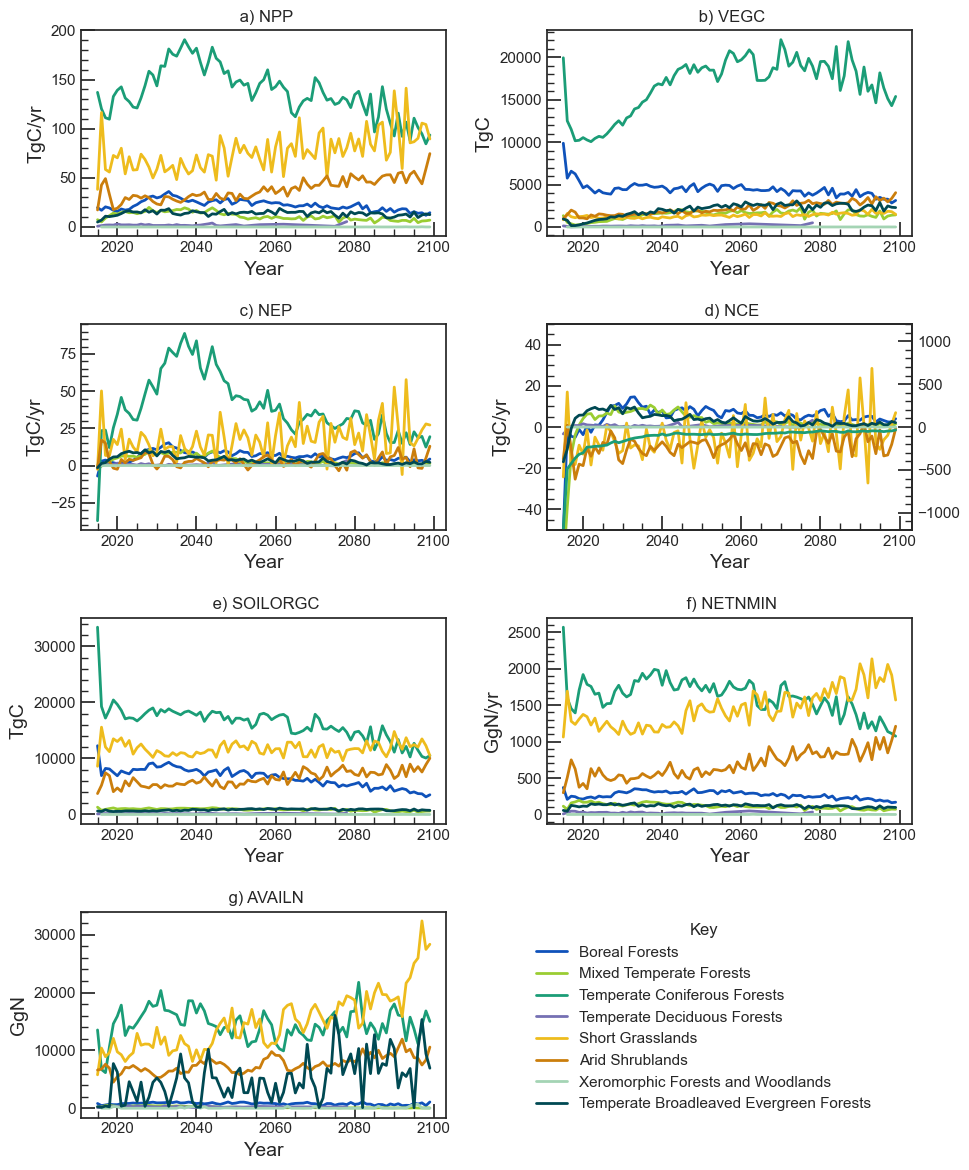

In [13]:
#Update the code to create 4 by 2 subplots, using the following lists:

#Create a list with all the data frames
dataframes = [npp_agg_models, vegc_agg_models, nep_agg_models, nce_agg_models, soilorgc_agg_models, netnmin_agg_models, availn_agg_models]

#Create a list with all the variable names
vars = ["TOTALNPP", "TOTALVEGC", "TOTALNEP", "TOTALNCE", "TOTALSOILORGC", "TOTALNETNMIN", "TOTALAVAILN"]
titles = [" a) NPP", " b) VEGC", " c) NEP", " d) NCE", " e) SOILORGC", " f) NETNMIN", " g) AVAILN"]

#Create a list with all the y-axis labels
ylabels = [ "TgC/yr", "TgC", "TgC/yr", "TgC/yr", "TgC",  "GgN/yr", "GgN"]

# Set plot theme


# Create the figure and subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 12))


sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2})

#flatten the axs array
axs = axs.flatten()

# loop through each variable and plot data
for i, var in enumerate(vars):
    #extract the dataframe we need for var
    dataframe = dataframes[i]
    #set the title for the subplot
    title = titles[i]
    #set the y-label for the subplot
    ylabel = ylabels[i]
    
    #Filter dataframe for POTVEG!=99
    dataframe = dataframe.query("POTVEG != 99")
    
    if var == "TOTALNCE":
        plot_df = dataframe.query("POTVEG != 99 and POTVEG != 9")
        plot_df_9 = dataframe.query("POTVEG == 9")

        # Plot data for var = "TOTALNCE" on the primary axis
        sns.lineplot(x="YEAR", y="TOTALNCE", hue="PFT", palette=palette, data=plot_df, ax=axs[i])
        
        plt.rcParams["xtick.top"] = False
        plt.rcParams["xtick.direction"] = "in"
        plt.rcParams["xtick.minor.size"] = 5
        plt.rcParams["xtick.major.size"] = 10
        plt.rcParams["xtick.minor.visible"] = True
        plt.rcParams["ytick.right"] = False
        plt.rcParams["ytick.direction"] = "in"
        plt.rcParams["ytick.minor.size"] = 5
        plt.rcParams["ytick.major.size"] = 10
        plt.rcParams["ytick.minor.visible"] = True

        # Set the y-axis label for the primary axis
        axs[i].set_ylabel("TgC/yr")
        axs[i].set_xlabel("Year")
        axs[i].set_ylim(-50, 50)

        
        # Create a twin axis for POTVEG = 9
        ax2 = axs[i].twinx()

        # Plot data for POTVEG = 9 on the secondary axis
        sns.lineplot(x="YEAR", y="TOTALNCE", hue="PFT", palette=palette, data=plot_df_9, ax=ax2,legend=False)
        
        ax2.tick_params(axis='both', which='both', top=False, direction='in', 
                  labelright=True, labelleft=False, 
                 labeltop=False, labelbottom= False, bottom=True, 
                 left=False, right=True,)

        # Set the y-axis label for the secondary axis
        ax2.set_ylabel("")
        ax2.set_ylim(-1200, 1200)
        
        
        
        
          
    else:
        # Plot data for var != "TOTALNCE" on the primary axis
        sns.lineplot(x="YEAR", y=var, hue="PFT", palette=palette, data=dataframe, ax=axs[i])
        
        plt.rcParams["xtick.top"] = False
        plt.rcParams["xtick.direction"] = "in"
        plt.rcParams["xtick.minor.size"] = 5
        plt.rcParams["xtick.major.size"] = 10
        plt.rcParams["xtick.minor.visible"] = True
        plt.rcParams["ytick.right"] = False
        plt.rcParams["ytick.direction"] = "in"
        plt.rcParams["ytick.minor.size"] = 5
        plt.rcParams["ytick.major.size"] = 10
        plt.rcParams["ytick.minor.visible"] = True

        # Set the y-axis label for the primary axis
        axs[i].set_ylabel(ylabel)
        axs[i].set_xlabel(r"Year")
    
    #Add title to subplot
    axs[i].set_title(title)
    
    #remove legend 
    axs[i].get_legend().remove()

# Set plot parameters

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)

axs[-1].remove()
#Legend
axs[-1].axis('off') # Turn off last subplot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title="Key", frameon=False, bbox_to_anchor=(0.9, 0.05))

plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
plt.rcParams["font.size"] = 16

plt.savefig("../figures/C_and_N_stocks_fluxes_trends.svg", dpi=1200,format="svg", bbox_inches="tight")
# Save the plot
plt.show()

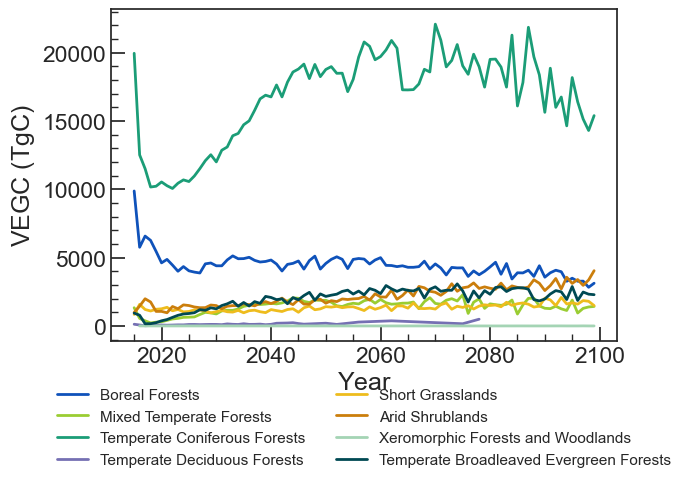

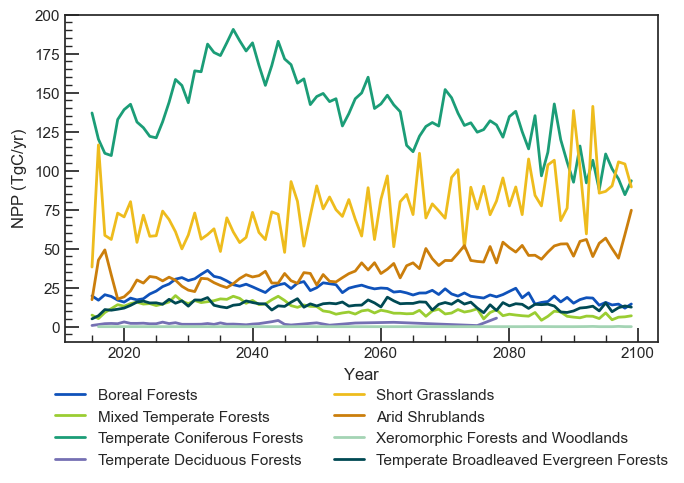

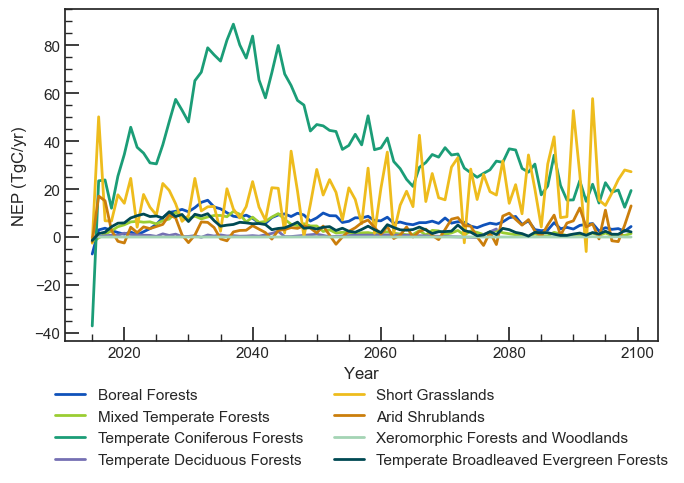

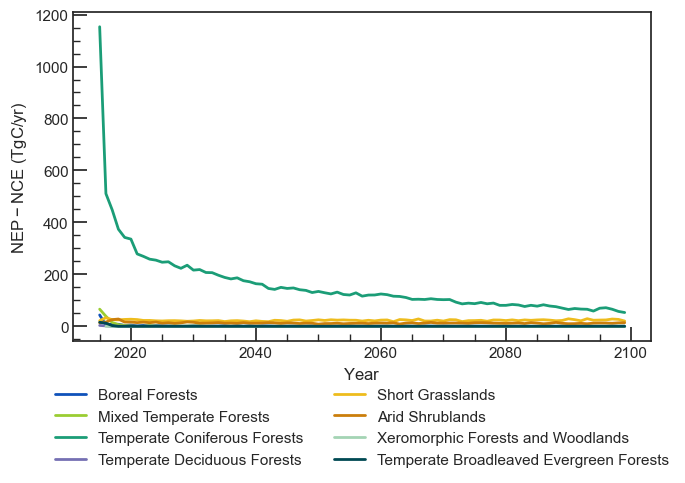

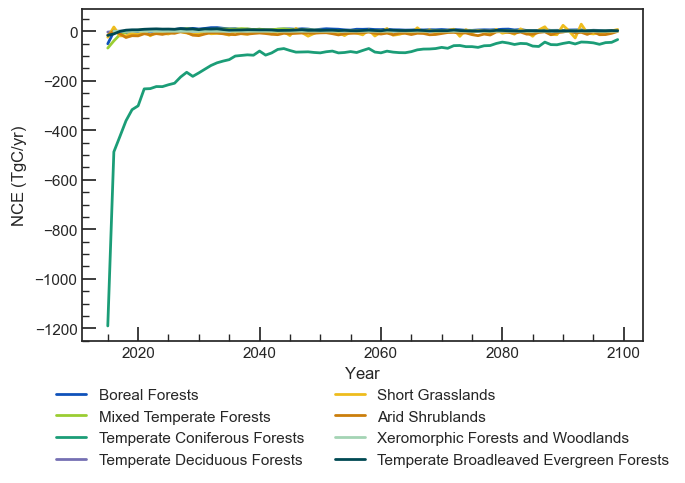

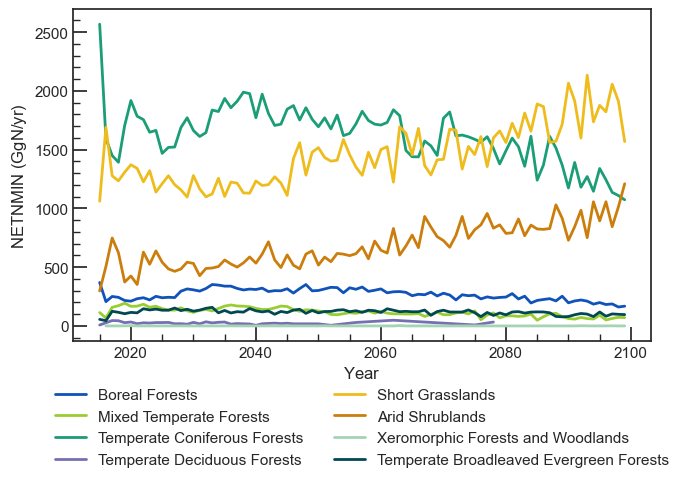

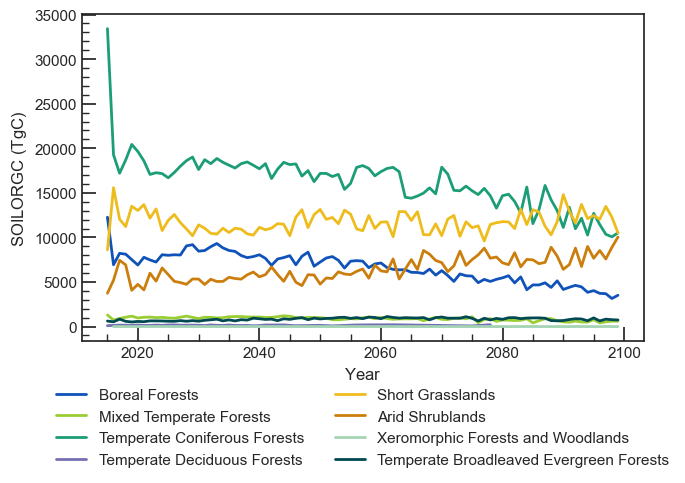

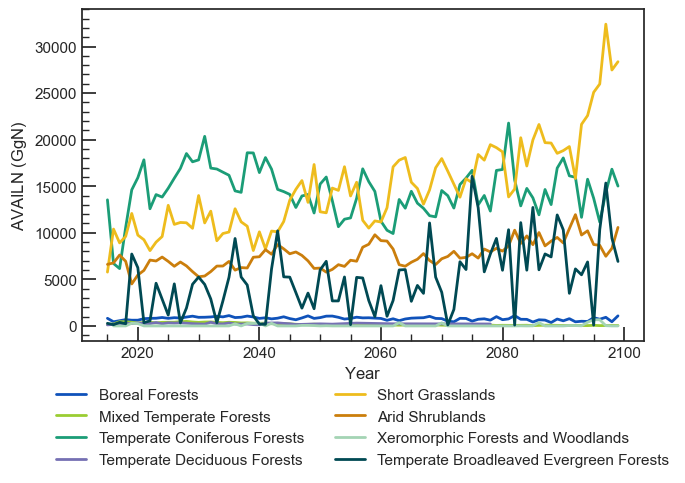

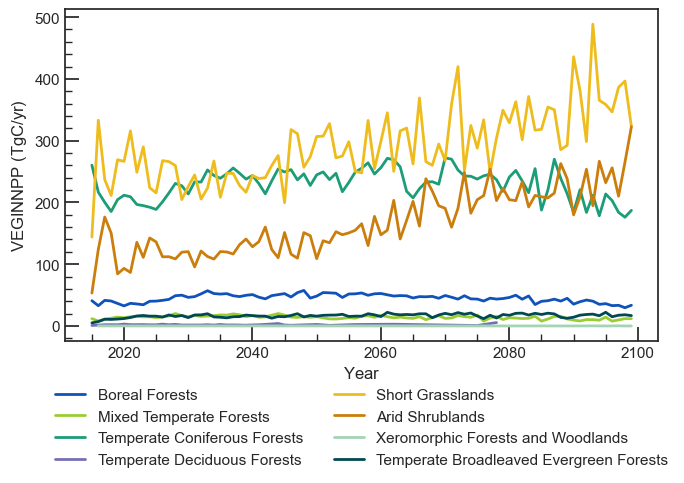

In [ ]:
# Plot VEGC aggregated data
plot_aggregated_data_one_subplot(
    vegc_agg_models,
    "TOTALVEGC",
    r"$VEGC$" + " (TgC)",
    "../figures/vegc_aggregated_trend." + image_format,
)

# Plot NPP aggregated data
plot_aggregated_data_one_subplot(
    npp_agg_models,
    "TOTALNPP",
    r"$NPP$"+ " (TgC/yr)",
    "../figures/npp_aggregated_trend." + image_format,
)

# Plot NEP aggregated data
plot_aggregated_data_one_subplot(
    nep_agg_models,
    "TOTALNEP",
    r"$NEP$"+" (TgC/yr)",
    "../figures/nep_aggregated_tend." + image_format,
)

# Plot NECB aggregated data
plot_aggregated_data_one_subplot(
    necb_agg_models,
    "TOTALNECB",
    r"$NEP-NCE$"+" (TgC/yr)",
    "../figures/necb_aggregated_tend." + image_format,
)


# Plot NCE  aggregated data
plot_aggregated_data_one_subplot(
    nce_agg_models,
    "TOTALNCE",
    r"$NCE$" +" (TgC/yr)",
    "../figures/nce_aggregated_tend." + image_format,
)

# Plot NETNMIN aggregated data

plot_aggregated_data_one_subplot(
    netnmin_agg_models,
    "TOTALNETNMIN",
    r"$NETNMIN$"+ " (GgN/yr)",
    "../figures/netnmin_aggregated_trend." + image_format,
)

# Plot SOILORGC aggregated data


plot_aggregated_data_one_subplot(
    soilorgc_agg_models,
    "TOTALSOILORGC",
    r"$SOILORGC$"+" (TgC)",
    "../figures/soilorgc_aggregated_trend.." + image_format,
)

# Plot AVAILN aggregated data (one plot)  
plot_aggregated_data_one_subplot(
    availn_agg_models,
    "TOTALAVAILN",
    r"$AVAILN$"+" (GgN)",
    "../figures/availn_aggregated_trend." + image_format,
)

# Plot VEGINNPP aggregated data (one plot)

plot_aggregated_data_one_subplot(
    veginnpp_agg_models,
    "TOTALVEGINNPP",
    r"$VEGINNPP$"+ " (TgC/yr)",
    "../figures/veginnpp_aggregated_trend." + image_format,
)




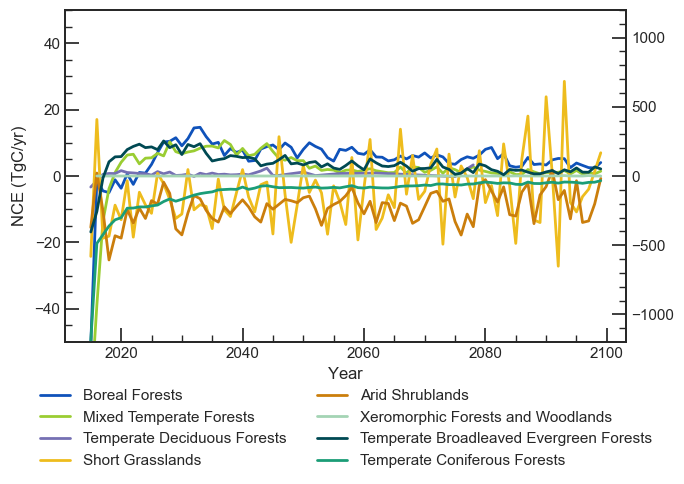

In [ ]:
#Plot NCE (twins) aggregated data
plot_df = nce_agg_models.query("POTVEG != 99 and POTVEG != 9") 
plot_df_9 = nce_agg_models.query("POTVEG == 9")
# Create the figure and subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Set plot theme
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2})

# Plot data for the specified potveg value
sns.lineplot(
    x="YEAR", y="TOTALNCE", hue="PFT", palette=palette, data=plot_df, legend=True, ax=ax
)

ax.set_ylabel(r"$NCE$" +" (TgC/yr)")
ax.set_xlabel(r"$Year$")
ax.set_ylim(-50, 50)

# Create a twin axis for POTVEG = 9
ax2 = ax.twinx()

# Plot data for POTVEG = 9 on the secondary axis
sns.lineplot(
    x="YEAR", y="TOTALNCE", hue="PFT", palette=palette, data=plot_df_9, legend=True, ax=ax2
)

# Set the y-axis label for the secondary axis
ax2.set_ylabel("")
ax2.set_ylim(-1200, 1200)

plt.rcParams['mathtext.default'] = 'regular'

ax2.tick_params(
    direction="in",
    which="major",
    length=10,
    bottom=True,
    top=False,
    left=False,
    right=True,
)

ax2.tick_params(
    direction="in",
    which="minor",
    length=5,
    bottom=True,
    top=False,
    left=False,
    right=True,
)

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
lgnd = ax2.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False,
)

# Hide original legends
ax.get_legend().remove()


# Set plot parameters
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["xtick.top"] = False
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["figure.autolayout"] = True
#plt.rcParams['mathtext.default'] = 'regular'

plt.savefig("../figures/twin_nce_aggregated_tend." , dpi=1200, format=image_format, bbox_inches="tight")

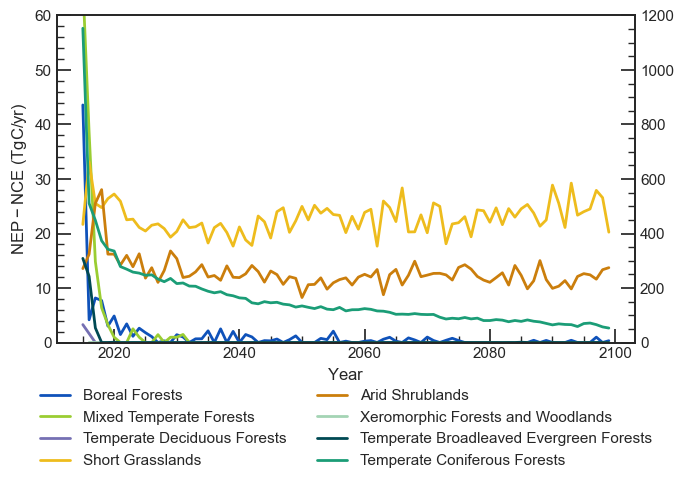

In [ ]:
# Plot NECB (twins) aggregated data
plot_df = necb_agg_models.query("POTVEG != 99 and POTVEG != 9") 
plot_df_9 = necb_agg_models.query("POTVEG == 9")
# Create the figure and subplots
fig, ax = plt.subplots(figsize=(7, 5))

# Set plot theme
sns.set_theme(style="ticks", font="sans-serif", rc={"lines.linewidth": 2})

# Plot data for the specified potveg value
sns.lineplot(
    x="YEAR", y="TOTALNECB", hue="PFT", palette=palette, data=plot_df, legend=True, ax=ax
)

ax.set_ylabel(r"$NEP-NCE$"+" (TgC/yr)")
ax.set_xlabel(r"$Year$")
ax.set_ylim(0, 60)

# Create a twin axis for POTVEG = 9
ax2 = ax.twinx()

# Plot data for POTVEG = 9 on the secondary axis
sns.lineplot(
    x="YEAR", y="TOTALNECB", hue="PFT", palette=palette, data=plot_df_9, legend=True, ax=ax2
)

# Set the y-axis label for the secondary axis
ax2.set_ylabel("")
ax2.set_ylim(0, 1200)

plt.rcParams['mathtext.default'] = 'regular'

ax2.tick_params(
    direction="in",
    which="major",
    length=10,
    bottom=True,
    top=False,
    left=False,
    right=True,
)

ax2.tick_params(
    direction="in",
    which="minor",
    length=5,
    bottom=True,
    top=False,
    left=False,
    right=True,
)

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
lgnd = ax2.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    frameon=False,
)

# Hide original legends
ax.get_legend().remove()


# Set plot parameters
plt.tight_layout(pad=1.5, w_pad=1.5, h_pad=1.5)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["xtick.top"] = False
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.minor.size"] = 5
plt.rcParams["xtick.major.size"] = 10
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.minor.size"] = 5
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.visible"] = True
plt.rcParams["figure.autolayout"] = True
#plt.rcParams['mathtext.default'] = 'regular'

plt.savefig("../figures/twin_necb_aggregated_tend." , dpi=1200, format=image_format, bbox_inches="tight")

In [ ]:
# Perform the Mann-Kendall test on the aggregated data




def calculate_trend_statistics(data, column_name):
    # Create a dictionary to hold the calculated statistics for each POTVEG
    stats_dict = {}

    # Iterate over each POTVEG
    for potveg in data["POTVEG"].unique():
        # Select data for the current POTVEG
        potveg_data = data[data["POTVEG"] == potveg]

        # Calculate the trend using the Mann-Kendall test
        x = potveg_data["YEAR"]
        y = potveg_data[column_name]
        trend_stat, p_value = kendalltau(y, x)

        # Add the statistics to the dictionary
        stats_dict[potveg] = {
            "trend_stat": trend_stat,
            "p_value": p_value,
            "trend_direction": "no trend "
            if abs(trend_stat) < 0.1
            else ("+" if trend_stat > 0 else "-"),
        }

    # Convert the dictionary to a DataFrame
    stats_df = pd.DataFrame.from_dict(stats_dict, orient="index")
    stats_df["significant"] = stats_df["p_value"].apply(
        lambda x: "True" if x < 0.05 else "False"
    )
    # Map the POTVEG codes to the POTVEG names
    stats_df["pft"] = stats_df.index.map(pft_labels)
    stats_df["variable"]=column_name
    # Reorder the columns
    stats_df = (
        stats_df[["pft","variable","trend_stat", "p_value", "significant", "trend_direction"]]
    ).round(6)

    # Return the DataFrame
    return stats_df


stats = calculate_trend_statistics(npp_agg_models, "TOTALNPP")
stats.to_csv("../data/trend_statistics.csv",index=False)
stats=calculate_trend_statistics(vegc_agg_models, "TOTALVEGC")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
stats=calculate_trend_statistics(nep_agg_models, "TOTALNEP")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
stats=calculate_trend_statistics(soilorgc_agg_models, "TOTALSOILORGC")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
stats=calculate_trend_statistics(netnmin_agg_models, "TOTALNETNMIN")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
stats=calculate_trend_statistics(availn_agg_models, "TOTALAVAILN")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
stats=calculate_trend_statistics(nce_agg_models, "TOTALNCE")
stats.to_csv("../data/trend_statistics.csv",index=False,mode="a")
